# Polynomial Regression, Regularization with Lasso and Ridge Regression

<b>Goals</b>

- Polynomial, Lasso, and Ridge regression. How they work and how to use them.
- The concept of Regularization. Why it's used and how it relates to the external bias vs variance problem.

## Polynomial regression

So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

We're going to use polynomial terms (squares, cubes, etc..) on a regression equation for the purpose of fitting non-linear data, which is data cannot be fit using a least squares model.

![formula](http://www.statisticshowto.com/wp-content/uploads/2015/01/excel-polynomial-regression.png)




#### Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


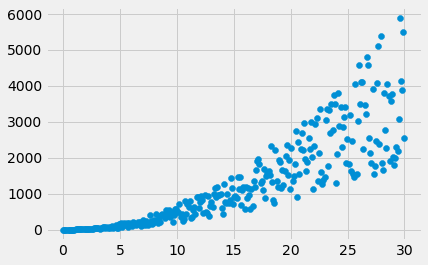

In [2]:
#Make random data to plot
#Input variable of 300 numbers from 0 to 30
X = np.linspace(0, 30, 300)
#Square x and assign it to y
y = (X**2)
#Throw in some randomness into y
y = y*(np.random.rand(300)*5+ 2)
#plt x and y
plt.style.use('fivethirtyeight')
plt.scatter(X, y)
plt.show()

Our data is clearly non linear but let's go ahead fit a linear model on it.

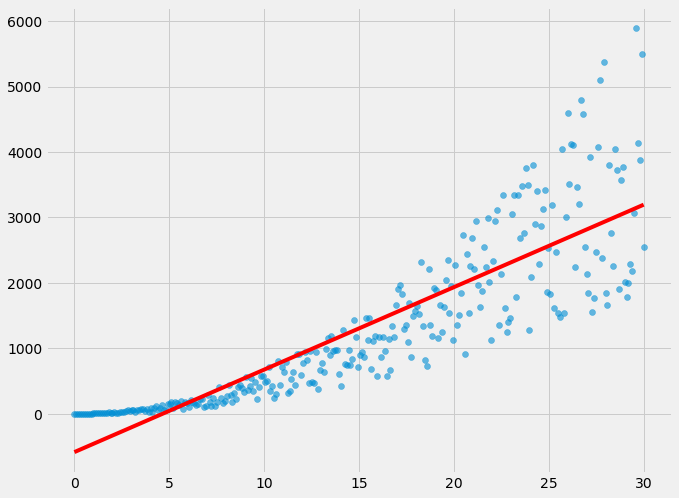

In [5]:
#Reshape X
X = X.reshape(-1, 1)

#Intialize linear regression model
lr = LinearRegression()

#Fit model
lr.fit(X, y)

#Make predictions
preds = lr.predict(X)

#Print score
print 
#plot data and predictions
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=.6)
plt.plot(X, preds, "r", linewidth = 4)
plt.show()

How good is the fit?

Let's use polynomial regression to model this.

In [6]:
#Intialize Polynomial Features object with degree = 2

poly = PolynomialFeatures(2)

#fit and transform Polynomial object on data, set equal to X2
X2 = poly.fit_transform(X)

In [7]:
#X2 shape
X2.shape

(300L, 3L)

In [9]:
#Look at first column
X2[:,0][:20]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [10]:
#Look at second column
X2[:,1][:20]

array([ 0.        ,  0.10033445,  0.2006689 ,  0.30100334,  0.40133779,
        0.50167224,  0.60200669,  0.70234114,  0.80267559,  0.90301003,
        1.00334448,  1.10367893,  1.20401338,  1.30434783,  1.40468227,
        1.50501672,  1.60535117,  1.70568562,  1.80602007,  1.90635452])

In [ ]:
#Look at third column, this is the squared version of the second column

In [11]:
X2[:,2][:20]

array([ 0.        ,  0.010067  ,  0.04026801,  0.09060301,  0.16107202,
        0.25167504,  0.36241205,  0.49328307,  0.6442881 ,  0.81542712,
        1.00670015,  1.21810718,  1.44964821,  1.70132325,  1.97313229,
        2.26507533,  2.57715238,  2.90936343,  3.26170848,  3.63418754])

What do you see?

The first column is an intercept, the second is the original, and the third is the transformed column.

Now let's throw this into our model.

In [12]:
#Intialize model
lr = LinearRegression()

#fit model on X2 
lr.fit(X2, y)

#Make predictions
preds = lr.predict(X2)

#Score model
lr.score(X2, y)


0.77803612251410836

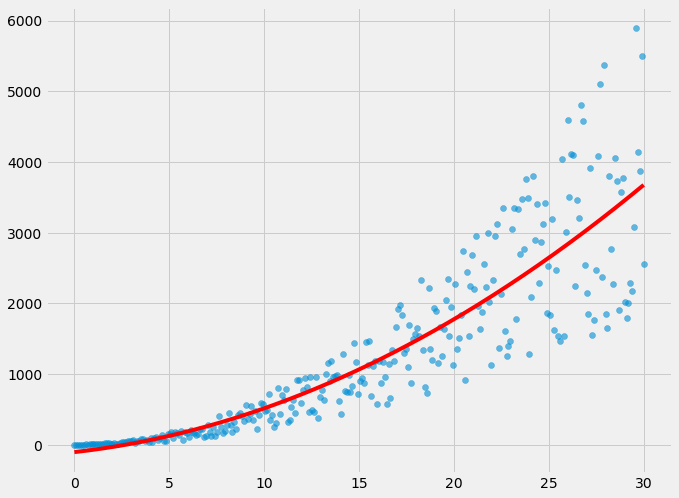

In [17]:
#Plot data and predictions

plt.figure(figsize=(10, 8))

#Plot the original X data versus, alpha is the brightness of the objects
plt.scatter(X, y, alpha= .6)

#Plot line plot of X and the new predictions
plt.plot(X, preds, "r", linewidth = 4);

Voila, here's our polynomial regression plot.

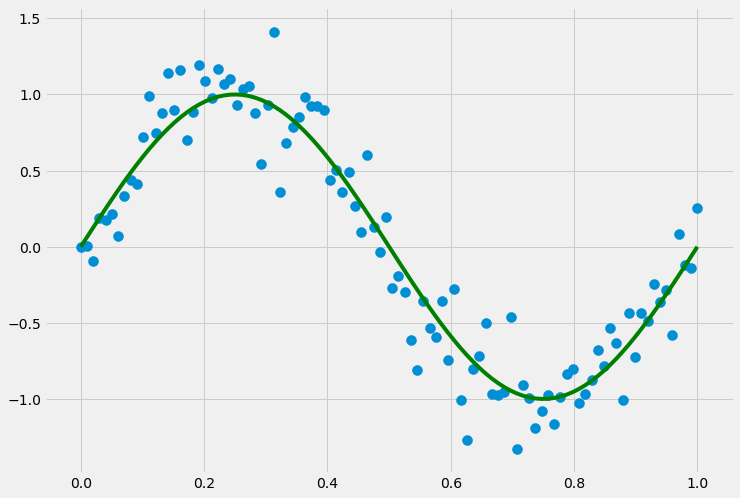

In [21]:

#Set random seeed
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# This returns 100 evenly spaced numbers from 0 to 1
X = np.linspace(0, 1, 100)

n_samples = 100

#Pass X into f and add random data to jitter data
y = f(X) + np.random.normal(scale=0.2, size=n_samples)

#Make "predictions" set equal to curve
curve = f(X)

# Plot the training data against what we know to be the ground truth sin function
plt.figure(figsize=(11, 8))
plt.plot(X, curve, color = 'green')
plt.scatter(X,y, s=100)
plt.show()

In [ ]:
Blue dots are the data
Have a cyclical data
Green line is the sin curve, the perfect model
compare to polynomial models to see how they compare
Chare the degrees of the polynomial function to the data

### Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We'll combine the PolynomialFeatures function with the [make_pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

In [23]:

#Assign a variable pip to make_pipeline function that tkes in Polynom and Linreg objects
#Specify degree = 3

pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())


#Reshape X
Xrs = X.reshape(-1,1)
#fit pipe object on X and y
pipe.fit(Xrs, y)
#Make predictions
preds= pipe.predict(Xrs)

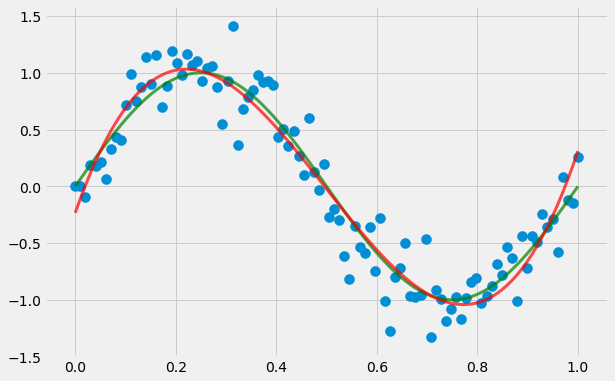

In [25]:
#Set size
plt.figure(figsize=(9, 6))

#Plot curve line
plt.plot(X, curve, linewidth =3, color ="green", alpha = .7)

#Scatter plot of data
plt.scatter(X, y, s = 100)

#Plot predictions from pipe
plt.plot(X, preds, linewidth = 3, color = 'red', alpha =.7)
plt.legend()
plt.show()

What do you make of the fit?

The previous code in function form

In [30]:
def polynomial_ploting(X, y, degree):
    pipe = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    #Reshape X
    Xrs = X.reshape(-1, 1)
    #fit pipe object on X and y
    pipe.fit(Xrs, y)
    preds = pipe.predict(Xrs)
    print ("R2 score is", pipe.score(Xrs, y))
    plt.figure(figsize=(9, 6))
    #Plot curve line
    plt.plot(X, curve, label='Curve Line', linewidth = 3, color='green')
    #Scatter plot of data
    plt.scatter(X, y, label='data', s=100)
    #Plot predictions from pipe
    plt.plot(X, preds,label= "Predicted Line with {} degrees".format(degree),
             linewidth = 3, color= "red")
    plt.legend()
    plt.show()

('R2 score is', 0.5129732610726736)


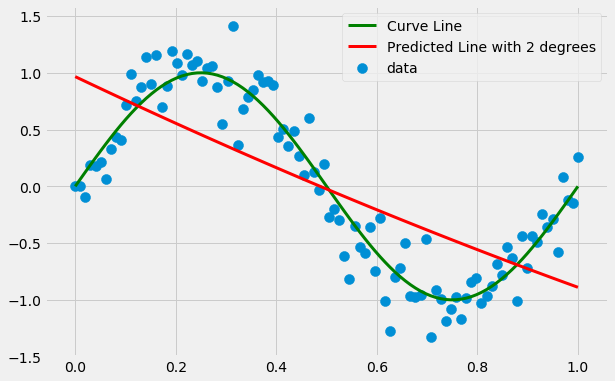

In [31]:
#Plot with 2 degrees
polynomial_ploting(X, y, 2)

('R2 score is', 0.92860934462033506)


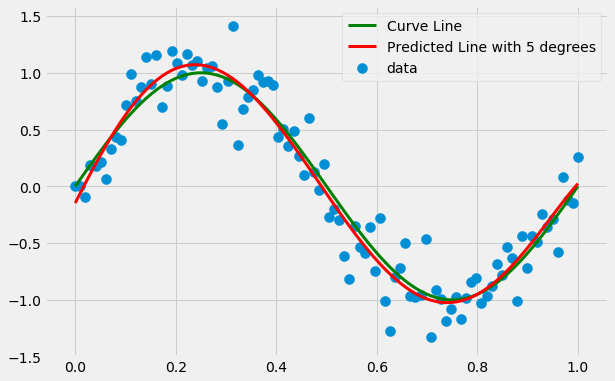

In [46]:
#Plot with 5 degrees
polynomial_ploting(X, y, 5)

#Much better fit, a line is a lot closer to mimic the curve
#Transform, square 2 degrees, cube 3 degrees
# This will give better results than linear, but not always

('R2 score is', 0.94988491915396622)


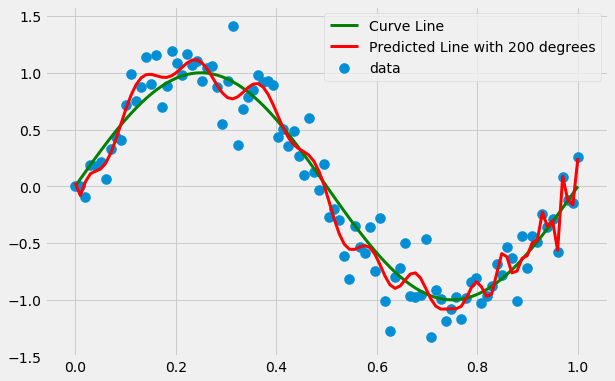

In [47]:
#Give me a value
polynomial_ploting(X, y, 200)

#As increase the number of degrees, see that model is trying to fit the noise

In [ ]:
#Give me another one but higher
Polynomial - have to be weary of the overfitting
After 10 degrees there is no point in going that high
The degrees you choose depends on the context - if want better performance than go with a lower degree and slightly worse prediction, if want a more accurate prediciton go with a higher degree

In [ ]:
#One last one


### What do you notice happens when we increase our degrees?

As the polynomial degree increase so does the overfitting of the model.

![overfit](reg_overfit.png)


In [ ]:
1: Too underfit
2: Just right
3. Too overfit

## Regularization

In simple terms it is the penalty on a model's complexity. Regularization helps prevent overfitting by penalizing large coefficients.

- If your model is very complex (i.e., lots of features, large features, high degree polynomial fit, etc.), you need to worry more about overfitting.
- Increasing model complexity leads multicolinearity because OLS-derived coefficients become increasingly large. This is a sign that the model is incorporating too much variance from the dataset aka <b>Overfitting</b>
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- Ridge and Lasso regression are two different regularization models.


![a](https://image.slidesharecdn.com/ch-4-demand-estimation2-110225045402-phpapp01/95/ch-4demandestimation2-11-728.jpg?cb=1298609672)

<b>Ridge</b>: It's function is the standard OLS function plus the squared value of each coefficient multipled by a constant/parameter (alpha) determined by you the data scientist. Similar to picking a K in a KNN model. 0 alpha equals OLS, very high alpha equals underfitting. Aka L2 regularization. Square of coefficients
![ridge](ridge.png)

The alpha or $\lambda$ can take any value greater than 0. Best way to choose an optimal regularization parameter is with cross-validation.

<b>Lasso</b>: OLS function plus the sum of the absolute values of each coefficient. Has an advantage over Ridge because it's great for feature selection because it shrinks values of insignificant features to 0. Aka L1 regularization. Absolute value of coeffcients
![e](lasso.png)

Ridge is better for dealing with multicollinearity and Lasso is better for high number of features.

In [48]:
#Load in boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
#Turn into pandas dataframe
df = pd.DataFrame(boston["data"])
df.columns = boston["feature_names"]
df["MEDV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
#Look at the data dictionary
boston["DESCR"].split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [50]:
#Assign X and y

X = df.drop("MEDV", axis =1)
y = df.MEDV

In [51]:
#Fit and score a linear regression model

lr = LinearRegression()
lr.fit(X, y)
lr.score(X ,y)

#.74 correlation

0.7406077428649428

In [53]:
#Fit and score a ridge regression model with alpha = 0.4
rid = Ridge(alpha=100)
rid.fit(X,y)
rid.score(X,y)

#Lower r squared because penalized it too much

0.71781243856776999

In [54]:
#Fit and score a lasso regression model with alpha = 0.4
las = Lasso(alpha=1)
las.fit(X,y)
las.score(X,y)

0.68254946175066511

What do we make of these results? How do the regularized models compare to the linear one?

Let's examine the best features using lasso regression

In [55]:
#Assign the lasso coefficients to coef variable
coef = las.coef_ #will give beta values/coeffcients for models
coef

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

In [56]:
#Zip column names and coef
dict(zip(X.columns, coef))

#shows which ones are significant and which ones arent
#Can't use coefficients and say Age is changed by .029; but can still see that negative/positive impact
#See that chas and indus are pretty much useless

{'AGE': 0.020927367934403553,
 'B': 0.0082911659531984937,
 'CHAS': 0.0,
 'CRIM': -0.063422545485846846,
 'DIS': -0.66900863855525117,
 'INDUS': -0.0,
 'LSTAT': -0.7614329574259161,
 'NOX': -0.0,
 'PTRATIO': -0.72319901352234439,
 'RAD': 0.26417500608389677,
 'RM': 0.94678566695975275,
 'TAX': -0.01520915140010352,
 'ZN': 0.049168668690269104}

Lasso assigns a 0 to features it thinks are useless, so what matters is the magnitude and not the direction of the feature coefficient.

Now time to cross-validate with the three models.

In [57]:
#Use cross_val_score function on linear regression and set scoring = r2
cross_val_score(LinearRegression(), X, y, cv = 5, scoring = "r2").mean()

0.35074135093252384

In [59]:
#Use cross_val_score function on ridge regression with alpha = 100 and set scoring = r2
cross_val_score(Ridge(100), X, y, cv =5, scoring ="r2").mean()

#Ridge gives a much better correlation

0.49254428000333483

In [60]:
#Use cross_val_score function on lasso regression with alpha = 1 and set scoring = r2
cross_val_score(Lasso(1), X, y, cv =5, scoring ="r2").mean()

#Not as high as ridge but still higher than linear regression, alpha is preventing model from overfitting

0.43176891192320488

How do the cross-validated scores of the Lasso/Ridge regressions compare to that of Linear regression?

Let's try this exercise again but with the polynomial transformed features.

In [61]:
#Transform the features to 2-degrees
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(X)

In [62]:
#Fit linear regression model on the Xp features and evaluate it on itself
lr = LinearRegression()
lr.fit(Xp, y)
lr.score(Xp, y)

0.9124770281919411

In [63]:
#Fit Ridge regression model with 1500000 alpha on the Xp features and evaluate it on itself
rid = Ridge(1500000)
rid.fit(Xp, y)
rid.score(Xp, y)

0.83950793908215537

In [64]:
#Fit Lasso regression model with 50 alpha on the Xp features and evaluate it on itself
las = Lasso(50)
las.fit(Xp, y)
las.score(Xp, y)

C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.82025648565609355

How do the Ridge & Lasso scores compare to that of the Linear score?

Cross-validation time.

In [65]:
#Linear regression cross-validation
cross_val_score(LinearRegression(), Xp, y, cv = 5, scoring = "r2").mean()

-7.0665738942836871

In [ ]:
#A negative r2 is very bad, our model is so poor that doing significantly worse than if predicted average value of y

What does a negative r-squared score mean?

In [67]:
#Ridge regression cross-validation
cross_val_score(Ridge(1500000), Xp, y, cv = 5, scoring ="r2").mean()

0.43321638690190162

In [68]:
#Lasso regression cross-validation
cross_val_score(Lasso(50), Xp, y, cv = 5, scoring ="r2").mean()

0.43768400860364476

In [ ]:
#R2 for lasso and ridge are very similar, they are higher than R2 of the single degree of linear regression
# Tested 6 different data and model combinations - Linear, Ridge and Lasson compared to Original/2-degree

**We've cross-validated six different data and algorithm combinations. What have we learned from this part?**

In [ ]:
#Trained on polynomial
# Had to use lasso/ridge to penalize model to prevent overfitting

**Class exercise:** 


- We're going to find the best alpha values for both ridge and lasso models trained on polynomial-transformed features.

- I want you plot a range of alpha values versus the cross validated r-squared scores aka a validation curve.


Ridge

In [73]:
# Pre-defined ridge_alphas
ridge_alphas = np.logspace(3, 7, 200)


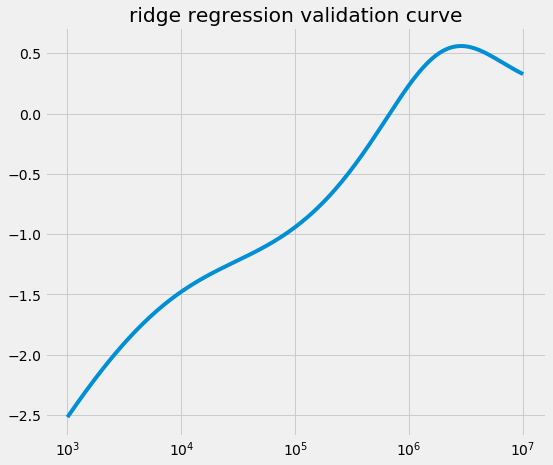

In [79]:
#Answer
ridge_cv_scores = []
for i in ridge_alphas:
    cv_score = cross_val_score(Ridge(alpha=i), Xp, y, cv = 5).mean()
    ridge_cv_scores.append(cv_score)
    
plt.figure(figsize=(8,7))
plt.title("ridge regression validation curve")
plt.plot(ridge_alphas, ridge_cv_scores)
plt.xscale("log");

Lasso

In [70]:
#Alpha values for lasso model
lasso_alphas = np.linspace(25, 160, 80)

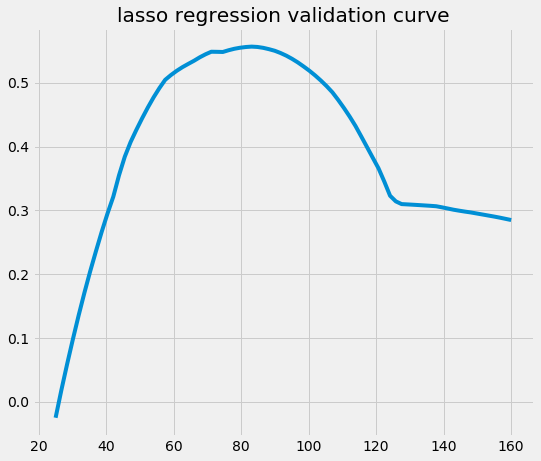

In [82]:
#Lasso
lasso_cv_scores = []
for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), Xp, y, cv = 5).mean()
    lasso_cv_scores.append(cv_score)
    
plt.figure(figsize=(8,7))
plt.title("lasso regression validation curve")
plt.plot(lasso_alphas, lasso_cv_scores)
#Best alpha value is around 80

## Regularized Polynomial Regression cont.

We're going to continue our lesson regularized polynomial regression by modeling higher degree data.

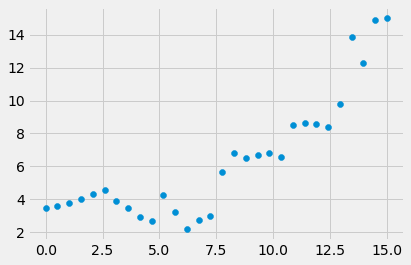

In [83]:
#Create random data and pass it into function
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))
N, n = 1000, 30
domain = np.linspace(0, 15, N)
x_sample = np.linspace(0, 15, n)
y_sample = func(x_sample)
#Plot random data
plt.scatter(x_sample, y_sample)

#data is not a linear relationship

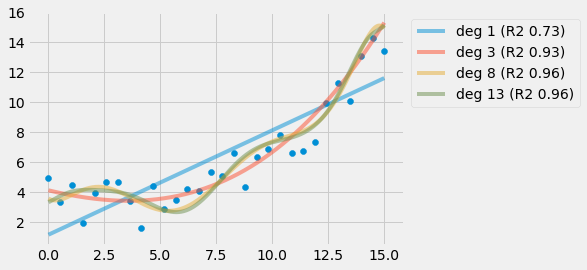

In [84]:
#Another way to reshape data
X = np.array([x_sample]).T
for degree in [1, 3, 8, 13]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

plt.scatter(x_sample, func(x_sample))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#Now data is comparing4 different models, all linear regression, changed by the degrees they are modeled on

Cross validation time

('For degree', 1, ', R2 =', 0.72453876759760705)
('For degree', 2, ', R2 =', 0.8901361632748952)
('For degree', 3, ', R2 =', 0.8549759789838326)
('For degree', 4, ', R2 =', 0.91556899403694714)
('For degree', 5, ', R2 =', 0.83590366157772356)


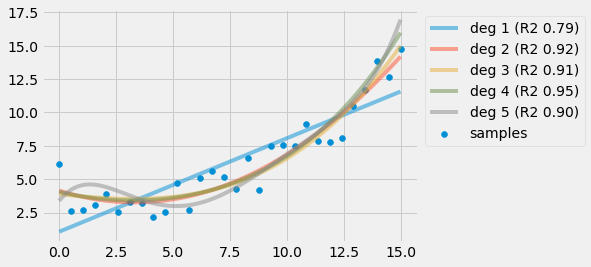

In [85]:
plt.scatter(x_sample, func(x_sample), label="samples")
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print ("For degree", degree, ", R2 =", np.mean(scores))
    # Take last model to plot predictions
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    
    #Overfitting with the higher degree of data

Function for cross validating various polynomial values

In [86]:
def analyze_performance(test_model, X, y_sample):
    scores = {'overfit': {}, 'cv': {}}
    for degree in range(1, 20):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        cv_scores = []
        for k in range(5):  # Compute a few R2 scores and print average performance
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

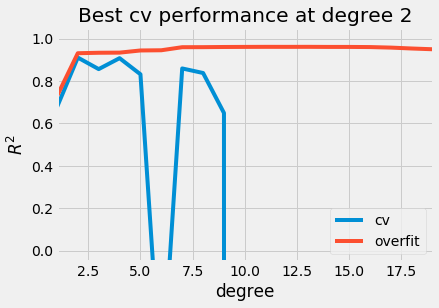

In [87]:
#Pass in empty linear regression and X and y_sample
scores = analyze_performance(LinearRegression(), X, y_sample)
scores.plot(ylim=(-.05,1.05))
plt.title("Best cv performance at degree %d" % scores.cv.argmax()), plt.xlabel('degree'), plt.ylabel('$R^2$');

Don't run this code!

In [ ]:
x_small_sample = x_sample[::4]
y_small_sample = func(x_small_sample)

degree, alpha = 4, 10

X = np.array([x_small_sample]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
m = ["Linear", "Ridge", "Lasso"]
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in range(40):  # Fit a few times the model to different training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_small_sample, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([x_small_sample]).T)
        MSE.append(np.square(y_pred_sample - y_small_sample).sum())
    axes[no].scatter(x_small_sample, y_small_sample, s=70)
    axes[no].set_title("%s  MSE %3d)" % (m[no], np.mean(MSE)))
    axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)

![a](lin_ridge_lasso.png)

- The unregularized `LinearRegression` leads to a model that is too complex and tries to fit the noise. 
- Note the differences in the (averaged) mean square error, or MSE, as well the complexity in the plots

40 models on each chart, each trained and plotted on each chart
Mean Squared Error

Let's incorpoate polynomial degrees a few degrees with the regularized models.

In [89]:
test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]

scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]

C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0064455002e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.51276944449e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.30529065351e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not 

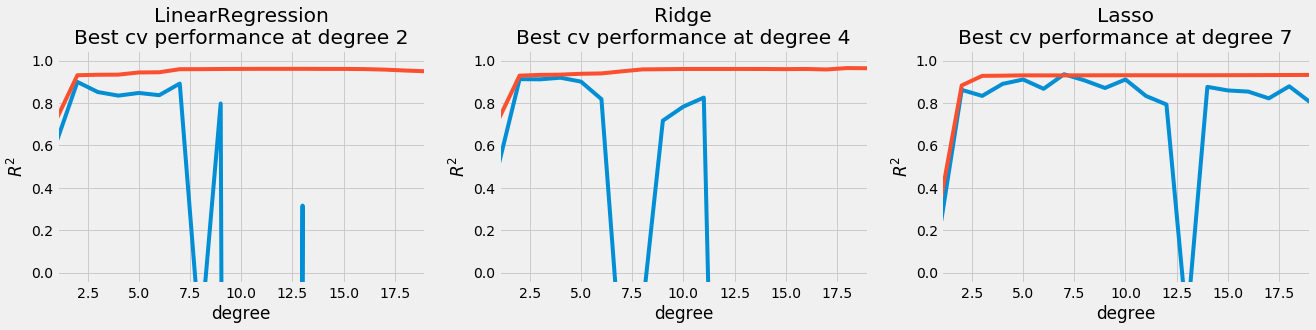

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, score in enumerate(scores):
    s, name = pd.DataFrame(score), test_models[no].__class__.__name__
    f = s.plot(ylim=(-.05,1.05), ax=axes[no], legend=False)
    f = axes[no].set_title("%s\nBest cv performance at degree %d" % (name, s.cv.argmax()))
    f = axes[no].set_xlabel('degree'), axes[no].set_ylabel('$R^2$')

Let's try a few different values for $\alpha$ as well.

C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.74001500369e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.89320752577e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.05475520571e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not

C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.25515320998e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.08927368396e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.64985239349e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not

C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.26143235801e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.14279965384e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.56281376189e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not

C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.2551763709e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3263234066e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.77094698354e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\lyoung\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not g

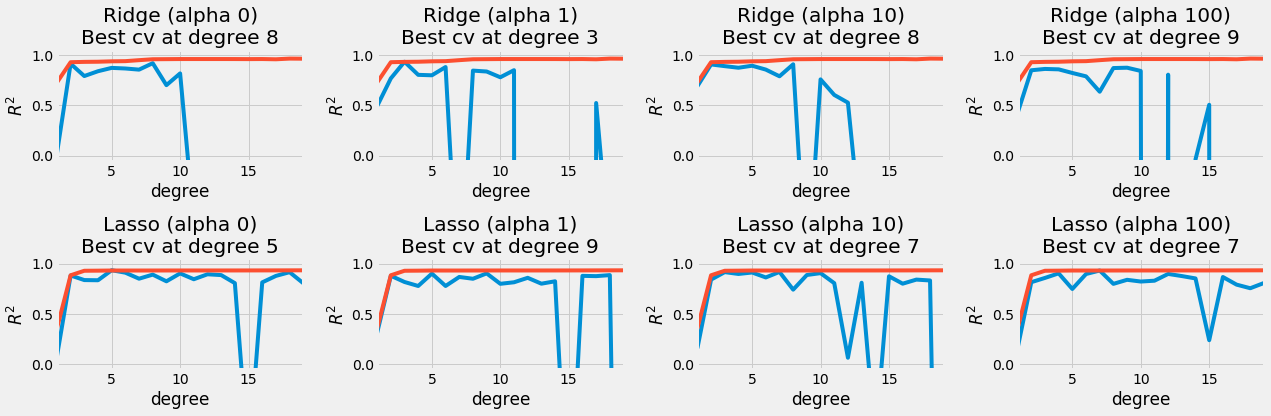

In [91]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
test_models = test_models[1:]
for col, alpha in enumerate([0, 1, 10, 100]):
    scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]
    for row, score in enumerate(scores):
        s, name = pd.DataFrame(score), test_models[row].__class__.__name__
        f = s.plot(ylim=(-.05,1.05), ax=axes[row, col], legend=False)
        f = axes[row, col].set_title("%s (alpha %d)\nBest cv at degree %d" % (name, alpha, s.cv.argmax()))
        f = axes[row, col].set_xlabel('degree'), axes[row, col].set_ylabel('$R^2$')
plt.tight_layout()

In [ ]:
Plotting how different alpha values can impact performance of models trained on various degrees
Each chart represents a model and alpha value
Then each chart cross validate for each degree polynomial from 1-20
Ridge regression and alpha value of 2
Cross validating and grabbing average r2 score and save to list, then do for the next polynomial chart
Then move on the next chart with the new alpha
See the changes on how alpha can change the performance on a whole set of models


### Resources:

- https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/
- http://connor-johnson.com/2014/02/18/linear-regression-with-python/
- http://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
- https://www.youtube.com/watch?v=nmHNXsDPPFQ
- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
- http://setosa.io/ev/ordinary-least-squares-regression/
- https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
- http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture23_RidgeRegression_20172018.pdf

### Class work


For the rest of class, work on modeling the King County housing dataset using the models and techniques we've covered in this class. Find out if lasso and ridge regressions can give us a better model with this dataset.

In [93]:
kc = pd.read_csv("../../data/kc_house_data.csv")

In [99]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [95]:
kc.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [100]:
kc.shape

(21613, 21)

In [125]:
#Reshape X
X_example = kc.drop(['price','date'], axis = 1)
y_example = kc.price

In [126]:
X_example.shape

(21613, 19)

In [127]:
y_example.shape

(21613L,)

In [128]:
y_example.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [129]:
y_test = y_example.reshape(-1, 1)
y_test.shape

C:\Users\lyoung\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(21613L, 1L)

In [130]:
y_test

array([[ 221900.],
       [ 538000.],
       [ 180000.],
       ..., 
       [ 402101.],
       [ 400000.],
       [ 325000.]])

In [133]:
#Intialize linear regression model
lr = LinearRegression()

#Fit model
lr.fit(X_example, y_test)

#Make predictions
preds_example = lr.predict(X_example)


In [134]:
preds_example

array([[ 205766.26460963],
       [ 731219.64982991],
       [ 379097.88265409],
       ..., 
       [ 147504.22423447],
       [ 391445.31930163],
       [ 150170.07469096]])

ValueError: x and y must have same first dimension, but have shapes (21613L, 19L) and (100L,)

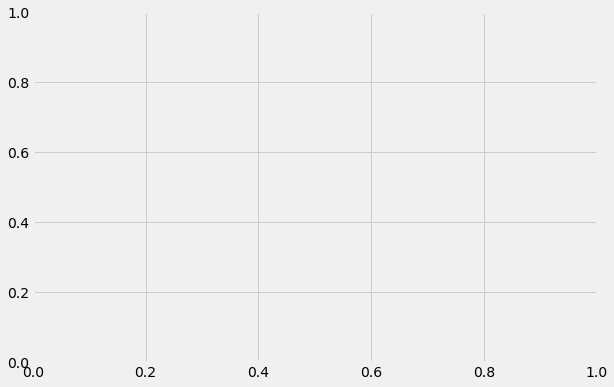

In [136]:
#Set size
plt.figure(figsize=(9, 6))

#Plot curve line
plt.plot(X_example, curve, linewidth =3, color ="green", alpha = .7)

#Scatter plot of data
plt.scatter(X_example, y_test, s = 100)

#Plot predictions from pipe
plt.plot(X_example, preds_example, linewidth = 3, color = 'red', alpha =.7)
plt.legend()
plt.show()